In [180]:
data <- readxl::read_excel("Datos.xlsx", col_names = FALSE, sheet = 1)
colnames(data) <- c("Año", "Mes", "Value")

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`


In [181]:
data <- subset(data, Año != 2023)
data$Value <- as.numeric(data$Value)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [182]:
head(data)

Año,Mes,Value
<chr>,<dbl>,<dbl>
1977,1,10.081
-,2,9.303
-,3,9.164
-,4,9.214
-,5,10.541
-,6,10.433


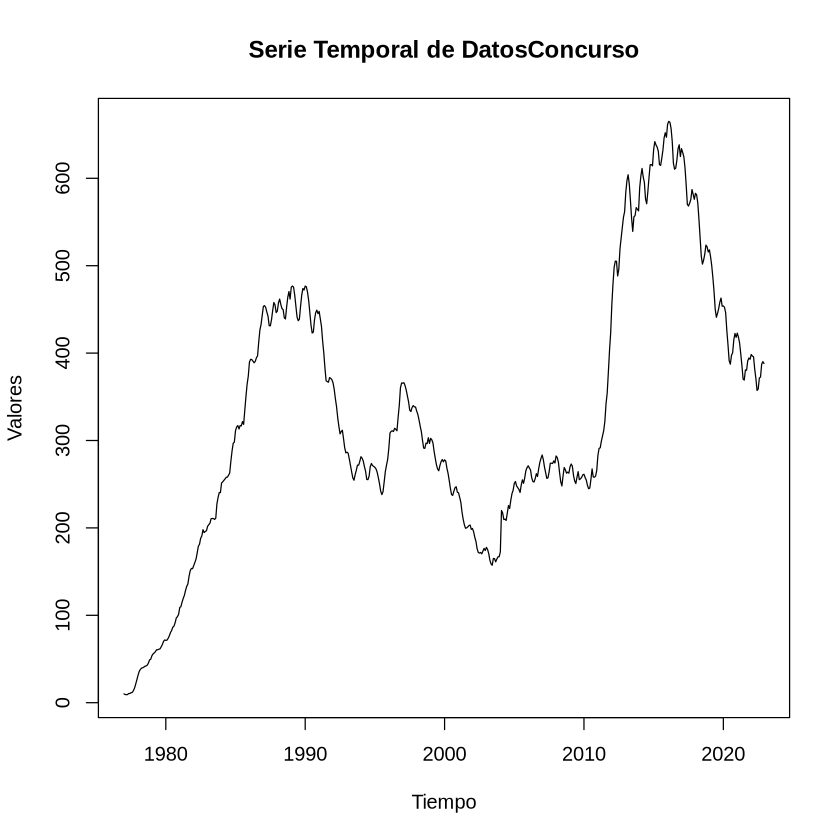

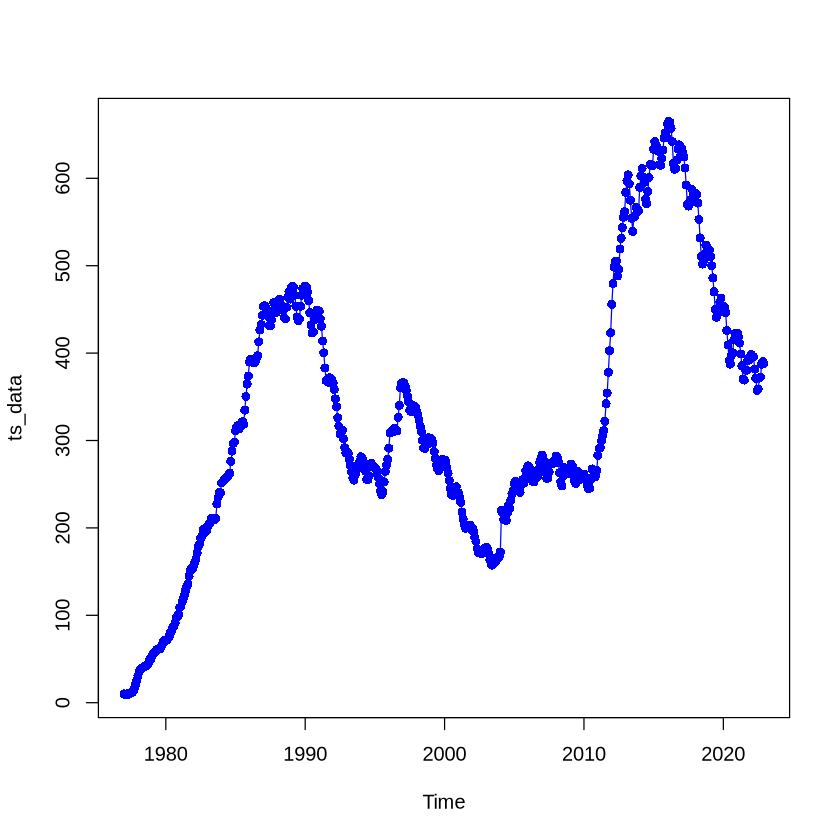

In [183]:
library(forecast)
library(tseries)

ts_data <- ts(data$Value, start=c(data$Año[1], data$Mes[1]), frequency=12)
ts_data <- window(ts_data, end=c(2022, 12))


# Plot de la serie temporal
plot(ts_data, main="Serie Temporal de DatosConcurso", ylab="Valores", xlab="Tiempo")

# Si deseas agregar más detalles al gráfico, como líneas y puntos, puedes usar ts.plot
ts.plot(ts_data, gpars=list(col="blue", lty=1, pch=16, type="o"))

In [184]:
ts_data

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1977,10.0810,9.3030,9.1640,9.2140,10.5410,10.4330,11.4050,11.6510,13.4910,16.4170,20.9320,25.7990
1978,30.9090,35.4210,37.9000,39.3880,39.9420,40.5780,41.6390,42.0530,42.8930,45.2750,48.9700,49.6910
1979,53.6150,55.7550,56.8930,58.2530,60.5470,60.5080,61.1440,61.5910,63.8690,66.4700,69.9910,71.7280
1980,71.3180,71.5310,73.6080,76.4330,80.1670,82.5260,86.3620,87.4870,91.4180,96.8040,98.4510,100.9920
1981,108.7650,109.9020,115.0950,119.2980,122.9150,128.5450,133.0920,135.8250,144.6180,150.9370,153.5890,153.3070
1982,156.7390,160.3580,164.2210,171.1900,178.9480,181.2400,188.1320,190.7930,197.9000,194.5900,195.9380,196.7780
1983,201.8190,203.7010,205.4030,210.5540,210.7660,210.6970,209.6580,211.0650,227.5100,234.8670,240.4560,240.3380
1984,251.3840,252.6770,254.3830,256.0280,257.9040,258.0510,260.2020,262.7730,276.1830,287.7130,296.6980,298.1840
1985,311.2190,315.4990,317.0650,313.1320,317.1450,316.7380,321.6020,318.4610,334.7460,350.3720,364.4190,373.6710
1986,389.7250,392.8370,392.6210,390.8320,388.9270,390.4560,394.6090,396.9180,412.8850,426.4110,432.7570,443.3120


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2023       395.6884 389.0025 402.3743 385.4632 405.9135
Feb 2023       395.3130 383.8293 406.7968 377.7502 412.8759
Mar 2023       392.8123 377.0156 408.6090 368.6533 416.9713
Apr 2023       379.9370 360.1027 399.7713 349.6031 410.2709
May 2023       367.9224 344.2128 391.6319 331.6618 404.1830
Jun 2023       352.5215 325.0402 380.0028 310.4925 394.5505
Jul 2023       351.5680 320.3882 382.7478 303.8826 399.2534
Aug 2023       362.3749 327.5543 397.1956 309.1213 415.6285
Sep 2023       365.8893 327.4775 404.3011 307.1435 424.6351
Oct 2023       379.2019 337.2448 421.1590 315.0340 443.3697
Nov 2023       382.9005 337.4423 428.3588 313.3781 452.4229
Dec 2023       379.9396 331.0237 428.8555 305.1292 454.7500


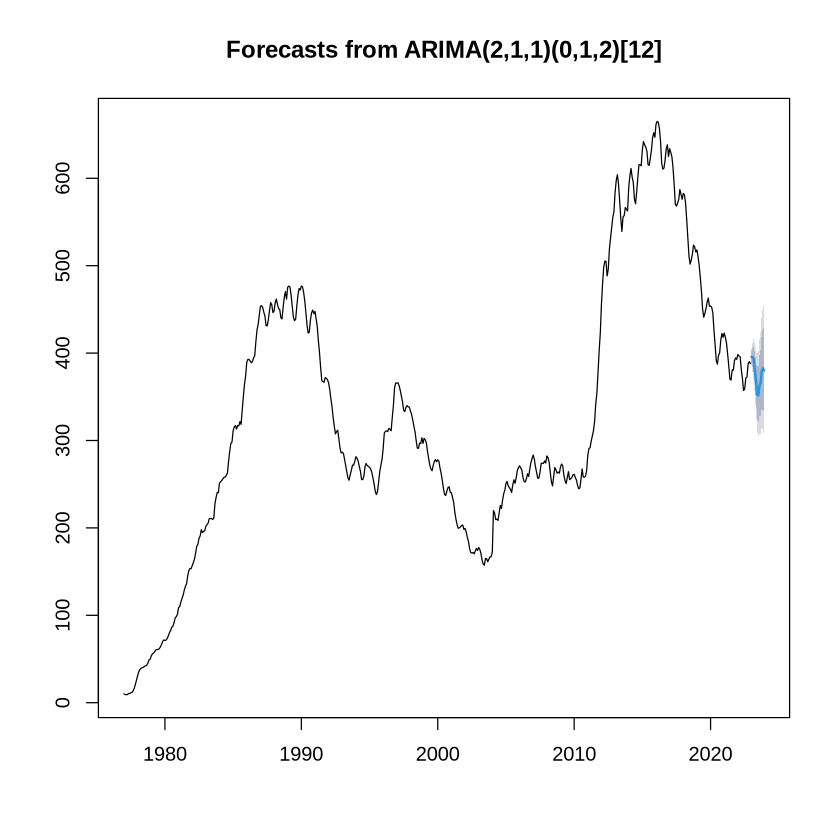

In [185]:
fit <- auto.arima(ts_data)

# Realizar la predicción para 2023
forecast_2023 <- forecast(fit, h=12)

# Mostrar la predicción
print(forecast_2023)

# Graficar los resultados
plot(forecast_2023)
lines(test_data, col='red')